In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Conv1D, GlobalAveragePooling1D, GlobalAveragePooling2D
from keras.layers import TimeDistributed, BatchNormalization, Bidirectional, Input, MaxPooling3D, MaxPooling2D, Dropout, UpSampling3D, UpSampling2D, UpSampling1D
from keras.models import Model
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import os
from keras.layers import ConvLSTM2D, ConvLSTM1D
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path= '/content/drive/MyDrive/UNSW_NB15/NUSW-NB15_features.csv'

In [ ]:
df_features = pd.read_csv(path, encoding='ISO-8859-1')
df_features

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [ ]:
path= '/content/drive/MyDrive/UNSW_NB15/UNSW_NB15_training-set.csv'

In [ ]:
df_train = pd.read_csv(path, encoding='ISO-8859-1')
df_train

,ï»¿id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [ ]:
df_train.columns

Index(['ï»¿id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [ ]:
path= '/content/drive/MyDrive/UNSW_NB15/UNSW_NB15_training-set.csv'

In [ ]:
df_test = pd.read_csv(path, encoding='ISO-8859-1')
df_test

,ï»¿id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [ ]:
# Remove erroneous 'label' row
df_train.drop(df_train.loc[df_train["label"] == "label"].index, inplace=True)

# Forcing 'proto' column to be strings and one-hot encoding
df_train = df_train.astype({"proto": str})
df_train = pd.get_dummies(df_train, columns=['proto'], drop_first=True)

df_train = df_train.astype({"state": str})
df_train = pd.get_dummies(df_train, columns=['state'], drop_first=True)

In [ ]:
# Remove erroneous 'label' row
df_test.drop(df_test.loc[df_test["label"] == "label"].index, inplace=True)

# Forcing 'proto' column to be strings and one-hot encoding
df_test = df_test.astype({"proto": str})
df_test = pd.get_dummies(df_test, columns=['proto'], drop_first=True)

df_test = df_test.astype({"state": str})
df_test = pd.get_dummies(df_test, columns=['state'], drop_first=True)

In [ ]:
df_train["attack_cat"].unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

In [ ]:
df_test["attack_cat"].unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

In [ ]:

df_train.head()

,ï»¿id,dur,service,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,...,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,1,0.000011,-,2,0,496,0,90909.0902,254,0,...,False,False,False,False,False,False,False,True,False,False
1,2,0.000008,-,2,0,1762,0,125000.0003,254,0,...,False,False,False,False,False,False,False,True,False,False
2,3,0.000005,-,2,0,1068,0,200000.0051,254,0,...,False,False,False,False,False,False,False,True,False,False
3,4,0.000006,-,2,0,900,0,166666.6608,254,0,...,False,False,False,False,False,False,False,True,False,False
4,5,0.000010,-,2,0,2126,0,100000.0025,254,0,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
df_test.head()

,ï»¿id,dur,service,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,...,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,1,0.000011,-,2,0,496,0,90909.0902,254,0,...,False,False,False,False,False,False,False,True,False,False
1,2,0.000008,-,2,0,1762,0,125000.0003,254,0,...,False,False,False,False,False,False,False,True,False,False
2,3,0.000005,-,2,0,1068,0,200000.0051,254,0,...,False,False,False,False,False,False,False,True,False,False
3,4,0.000006,-,2,0,900,0,166666.6608,254,0,...,False,False,False,False,False,False,False,True,False,False
4,5,0.000010,-,2,0,2126,0,100000.0025,254,0,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
# Assuming `df` is your DataFrame
columns_to_drop = [
    'service',
    'is_ftp_login',
    'ct_ftp_cmd',
    'ï»¿id',
    'attack_cat'
]

df_train.drop(columns=columns_to_drop, inplace=True)
df_train


,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,0.000011,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,...,False,False,False,False,False,False,False,True,False,False
1,0.000008,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,...,False,False,False,False,False,False,False,True,False,False
2,0.000005,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,...,False,False,False,False,False,False,False,True,False,False
3,0.000006,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,...,False,False,False,False,False,False,False,True,False,False
4,0.000010,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,...,False,False,False,False,False,False,False,True,False,False
82328,1.106101,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,...,False,False,False,False,False,False,True,False,False,False
82329,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,False,False,False,False,False,False,False,True,False,False
82330,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
# Assuming `df` is your DataFrame
columns_to_drop = [
    'service',
    'is_ftp_login',
    'ct_ftp_cmd',
    'ï»¿id',
    'attack_cat'
]

df_test.drop(columns=columns_to_drop, inplace=True)
df_test


,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,0.000011,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,...,False,False,False,False,False,False,False,True,False,False
1,0.000008,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,...,False,False,False,False,False,False,False,True,False,False
2,0.000005,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,...,False,False,False,False,False,False,False,True,False,False
3,0.000006,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,...,False,False,False,False,False,False,False,True,False,False
4,0.000010,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,...,False,False,False,False,False,False,False,True,False,False
82328,1.106101,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,...,False,False,False,False,False,False,True,False,False,False
82329,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,False,False,False,False,False,False,False,True,False,False
82330,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
# Remove missing values and duplicates
df_train.dropna(inplace=True)
df_train.drop_duplicates(inplace=True)

In [ ]:
# Remove missing values and duplicates
df_test.dropna(inplace=True)
df_test.drop_duplicates(inplace=True)

In [ ]:
# Replace infinities with NaN and then drop NaNs
df_train.replace([np.inf, -np.inf], np.nan, inplace=True)
df_train.dropna(inplace=True)

In [ ]:
# Replace infinities with NaN and then drop NaNs
df_test.replace([np.inf, -np.inf], np.nan, inplace=True)
df_test.dropna(inplace=True)

In [ ]:
# Separate features and labels
X_train = df_train.drop(["label"], axis=1)
y_train = df_train["label"]

In [ ]:
# Separate features and labels
X_test = df_test.drop(["label"], axis=1)
y_test = df_test["label"]

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Standardize the features
ss = StandardScaler()
X_train = ss.fit_transform(X_train)

# Encode the labels
le = LabelEncoder()

# If y is a numpy array, use np.unique to get unique target classes
target_class = np.unique(y_train)

# Transform the labels using LabelEncoder
y_train = le.fit_transform(y_train)

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Standardize the features
ss = StandardScaler()
X_test = ss.fit_transform(X_test)

# Encode the labels
le = LabelEncoder()

# If y is a numpy array, use np.unique to get unique target classes
target_class = np.unique(y_test)

# Transform the labels using LabelEncoder
y_test = le.fit_transform(y_test)

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_train = np.expand_dims(X_train,axis=1)
X_test = np.expand_dims(X_test,axis=1)

print(X_train.shape)
print(X_test.shape)

(53946, 1, 173, 1)
(53946, 1, 173, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv2D, GlobalAveragePooling1D, GlobalAveragePooling2D, Reshape
def hybrid():

    inpTensor = Input((None,X_train.shape[2], X_train.shape[3]))

    #encoder
    net1 = ConvLSTM1D(filters=128, kernel_size=4,
                   padding='same', return_sequences=True)(inpTensor)

    max_pool1 = MaxPooling2D(pool_size=(2, 2), strides=2,
    padding='same')(net1)

    bn1 = BatchNormalization()(max_pool1)

    dp1 = Dropout(0.3)(bn1)

    net2 = ConvLSTM1D(filters=256, kernel_size=4,
                    padding='same', return_sequences=True)(dp1)

    max_pool2 = MaxPooling2D(pool_size=(2, 2), strides=2,
    padding='same')(net2)

    bn2 = BatchNormalization()(max_pool2)

    dp2 = Dropout(0.3)(bn2)


    #decoder
    net4 = ConvLSTM1D(filters=256, kernel_size=8,
                    padding='same', return_sequences=True)(dp2)

    up1 = UpSampling2D((2, 2))(net4) #(2,2,2) for 3d

    net5= ConvLSTM1D(filters=128, kernel_size=4,
                    padding='same', return_sequences=True)(up1)

    up2 = UpSampling2D((2, 2))(net5)

    out = Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid',
                  padding='same', data_format='channels_last')(up2)

    out2 = GlobalAveragePooling2D()(out)

    outfinal = Dense(2,activation="sigmoid")(out2)

    #or use only return out
    return Model(inpTensor, outfinal)

In [ ]:
model = hybrid()

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, None, 173, 1)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_lstm1d (ConvLSTM1D)             │ (None, None, 173, 128)      │         264,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, None, 87, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, None, 87, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, None, 87, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_lstm1d_1 (ConvLSTM1D)           │ (None, None, 87, 256)       │       1,573,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, None, 44, 256)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, None, 44, 256)       │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, None, 44, 256)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_lstm1d_2 (ConvLSTM1D)           │ (None, None, 44, 256)       │       4,195,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, None, 88, 256)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_lstm1d_3 (ConvLSTM1D)           │ (None, None, 88, 128)       │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, None, 176, 128)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, None, 176, 1)        │           1,153 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1)                   │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,823,557 (26.03 MB)

 Trainable params: 6,822,789 (26.03 MB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.005,epsilon=1e-6) # consider beta_1=0.95
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=5,batch_size=256)

Epoch 1/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 132s 415ms/step - accuracy: 0.6086 - loss: 0.6685 - val_accuracy: 0.6340 - val_loss: 0.6568
Epoch 2/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 80s 293ms/step - accuracy: 0.6351 - loss: 0.6562 - val_accuracy: 0.6340 - val_loss: 0.6568
Epoch 3/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 76s 264ms/step - accuracy: 0.6355 - loss: 0.6486 - val_accuracy: 0.6340 - val_loss: 0.5856
Epoch 4/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 91s 306ms/step - accuracy: 0.7932 - loss: 0.4681 - val_accuracy: 0.8873 - val_loss: 0.3947
Epoch 5/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 82s 305ms/step - accuracy: 0.9088 - loss: 0.3684 - val_accuracy: 0.9170 - val_loss: 0.3221


In [ ]:
print(history.history)

{'accuracy': [0.628721296787262, 0.634041428565979, 0.634041428565979, 0.8591554760932922, 0.9104289412498474], 'loss': [0.660703718662262, 0.656795084476471, 0.6182458400726318, 0.4358200132846832, 0.35248157382011414], 'val_accuracy': [0.634041428565979, 0.634041428565979, 0.634041428565979, 0.8872947096824646, 0.9170466661453247], 'val_loss': [0.6567719578742981, 0.6568307280540466, 0.5855664014816284, 0.39470043778419495, 0.32206085324287415]}


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


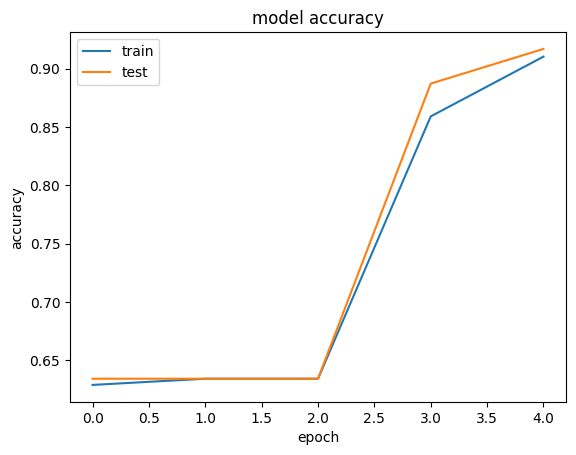

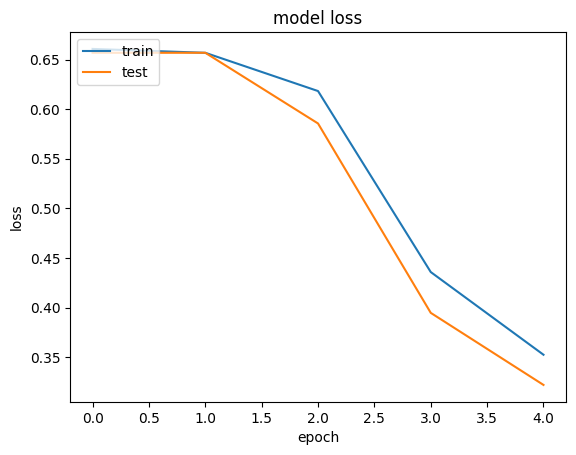

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_hat = (model.predict(X_test)>0.5).astype('int32')

1686/1686 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step


{0: {'precision': 0.9503434976497529, 'recall': 0.9221143725880014, 'f1-score': 0.9360161443494777, 'support': 34204.0}, 1: {'precision': 0.8716639367954524, 'recall': 0.9165231486171613, 'f1-score': 0.8935308641975309, 'support': 19742.0}, 'accuracy': 0.9200682163645126, 'macro avg': {'precision': 0.9110037172226026, 'recall': 0.9193187606025814, 'f1-score': 0.9147735042735043, 'support': 53946.0}, 'weighted avg': {'precision': 0.9215500395548877, 'recall': 0.9200682163645126, 'f1-score': 0.9204682927801354, 'support': 53946.0}}


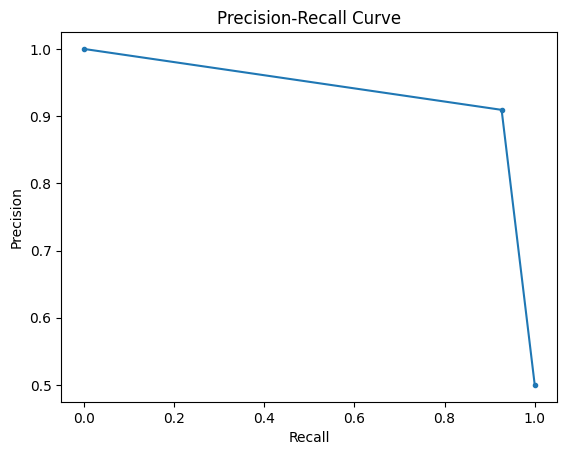

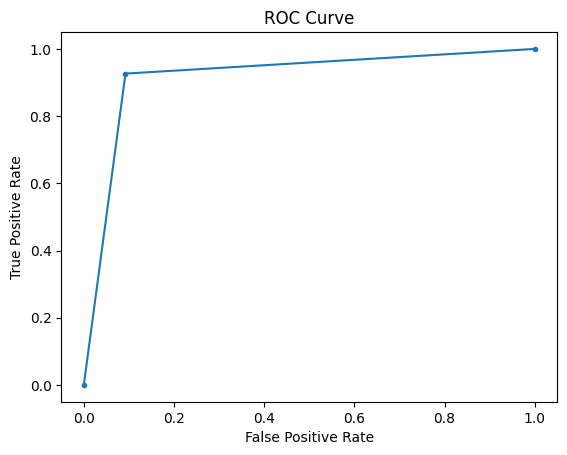

In [ ]:
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, roc_curve

# Precision, Recall, F1-score
report = classification_report(y_test.argmax(axis=1), y_hat.argmax(axis=1), target_names=le.classes_, output_dict=True)
print(report)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test.ravel(), y_hat.ravel())
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test.ravel(), y_hat.ravel())
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

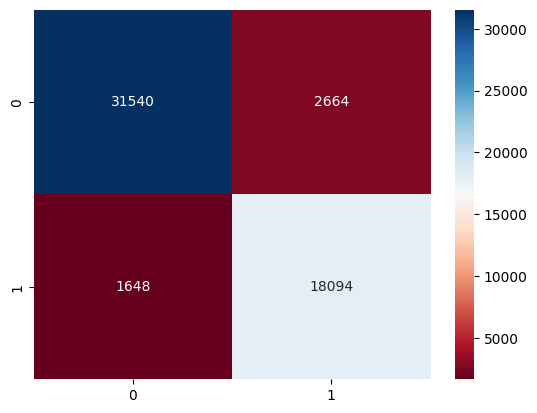

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix without normalization
matrix = confusion_matrix(y_test.argmax(axis=1), y_hat.argmax(axis=1))

# Plot the heatmap with raw counts
sns.heatmap(matrix, annot=True, fmt="d", cmap="RdBu")
plt.show()


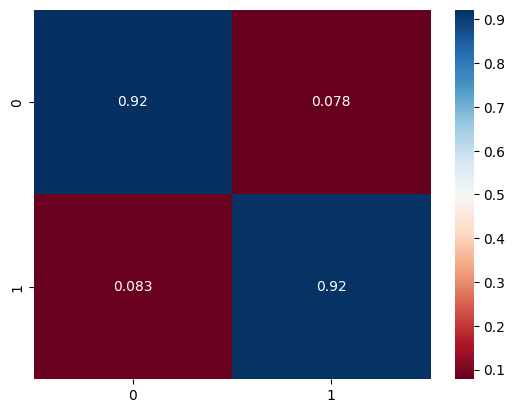

In [ ]:
matrix = confusion_matrix(y_test.argmax(axis=1), y_hat.argmax(axis=1))
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(matrix, annot = True, cmap = "RdBu")
plt.show()

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=711a70516dc2c739fc3bbaf2ca449c2ff231f2cb77ff1b1448761369613ec0c6
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
# Extract feature names (excluding the target column if included)
feature_names = df_train.columns.tolist()

In [ ]:
print(feature_names)

['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label', 'proto_a/n', 'proto_aes-sp3-d', 'proto_any', 'proto_argus', 'proto_aris', 'proto_arp', 'proto_ax.25', 'proto_bbn-rcc', 'proto_bna', 'proto_br-sat-mon', 'proto_cbt', 'proto_cftp', 'proto_chaos', 'proto_compaq-peer', 'proto_cphb', 'proto_cpnx', 'proto_crtp', 'proto_crudp', 'proto_dcn', 'proto_ddp', 'proto_ddx', 'proto_dgp', 'proto_egp', 'proto_eigrp', 'proto_emcon', 'proto_encap', 'proto_etherip', 'proto_fc', 'proto_fire', 'proto_ggp', 'proto_gmtp', 'proto_gre', 'proto_hmp', 'proto_i-nlsp', 'proto_iatp', 'proto_ib', 'proto_idpr', 'proto_idpr-cmtp', 'proto_id

In [ ]:
X_train.shape

(53946, 1, 173, 1)

In [ ]:
import lime
from lime import lime_tabular
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'model', 'X_train', 'X_test', 'y_test', and 'actual_feature_names' are already defined

# Flatten X_train if it's not already flat
X_train_flat = X_train.reshape(X_train.shape[0], -1)

# Define the predict wrapper function for your model
def predict_wrapper(input_data):
    reshaped_data = input_data.reshape((input_data.shape[0], 1, input_data.shape[1], 1))
    predictions = model.predict(reshaped_data)
    predictions = predictions / predictions.sum(axis=1, keepdims=True)
    return predictions

# Initialize LIME Tabular Explainer
explainer = lime_tabular.LimeTabularExplainer(
    X_train_flat,
    feature_names=feature_names,  # Use your actual feature names here
    class_names=['Normal', 'Attack'],  # Update with your actual class names
    mode='classification'
)

def create_prediction_plot(probabilities, feature_values):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [1, 2]})
    fig.suptitle('Prediction Probabilities and Feature Values', fontsize=16)

    # Prediction probabilities
    ax1.barh(['Attack', 'Normal'], probabilities, color=['orange', 'blue'])
    ax1.set_xlim(0, 1)
    ax1.set_xlabel('Probability')
    ax1.set_title('Prediction Probabilities')

    for i, v in enumerate(probabilities):
        ax1.text(v, i, f'{v:.2f}', va='center')

    # Feature values
    feature_names = list(feature_values.keys())
    values = list(feature_values.values())
    colors = ['lightblue' for name in feature_names]  # Default color for all features

    ax2.barh(feature_names, values, color=colors)
    ax2.set_title('Feature Values')
    ax2.set_xlabel('Value')

    for i, v in enumerate(values):
        ax2.text(v, i, f'{v:.2f}', va='center')

    plt.tight_layout()
    return fig

def explain_and_save(sample_index):
    flat_sample = X_test[sample_index].reshape(-1)
    true_label = np.argmax(y_test[sample_index])  # Assuming y_test is one-hot encoded

    exp = explainer.explain_instance(
        flat_sample,
        predict_wrapper,
        num_features=10
    )

    # Save LIME explanation plot
    fig = exp.as_pyplot_figure()
    fig.savefig(f'lime_explanation_{sample_index}.png')
    plt.close(fig)

    predicted_probabilities = predict_wrapper(flat_sample.reshape(1, -1))[0]
    predicted_label = np.argmax(predicted_probabilities)

    # Get feature values
    feature_values = {name: value for name, value in zip(feature_names, flat_sample)}

    # Create and save prediction plot
    pred_fig = create_prediction_plot(predicted_probabilities, dict(sorted(feature_values.items(), key=lambda x: abs(x[1]), reverse=True)[:10]))
    pred_fig.savefig(f'prediction_plot_{sample_index}.png')
    plt.close(pred_fig)

    print(f"Sample {sample_index}:")
    print(f"True label: {'Normal' if true_label == 0 else 'Attack'}")
    print(f"Predicted label: {'Normal' if predicted_label == 0 else 'Attack'}")

    if true_label == predicted_label:
        print("The prediction is correct.")
    else:
        print("The prediction is incorrect.")
    print("\n")

# Explain and save for multiple samples
num_samples_to_explain = 5  # Adjust as needed
for i in range(num_samples_to_explain):
    explain_and_save(i)

print("Explanations and visualizations have been saved.")


157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Sample 0:
True label: Normal
Predicted label: Normal
The prediction is correct.


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Sample 1:
True label: Normal
Predicted label: Normal
The prediction is correct.


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Sample 2:
True label: Normal
Predicted label: Normal
The prediction is correct.


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Sample 3:
True label: Normal
Predicted label: Normal
The prediction is correct.


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Sample 4:
True label: Normal
Predicted label: Normal
The prediction is correct.


Explanations and visualizations have been saved.
